In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("property_tax_report.csv")

In [3]:
df.columns

Index(['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],
      dtype='object')

In [8]:
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,007-625-022,LAND,600280040000,60028004,CD-1 (109),Comprehensive Development,1,2,VAP15707,THSL,...,NaN,6889000.0,8160000.0,2018.0,5439000.0,7169000.0,1977.0,1978.0,38563.84,20
1,018-381-987,STRATA,157612510070,15761251,CD-1 (266),Comprehensive Development,70,NaN,LMS1008,NaN,...,NaN,8200.0,6700.0,2018.0,7100.0,7800.0,1993.0,1993.0,36.77,30
2,018-381-952,STRATA,157612510067,15761251,CD-1 (266),Comprehensive Development,67,NaN,LMS1008,NaN,...,NaN,9800.0,5100.0,2018.0,9000.0,5900.0,1993.0,1993.0,36.77,30
3,016-222-989,STRATA,605119050016,60511905,RM-5B,Multiple Family Dwelling,16,NaN,VAS2702,185,...,NaN,470000.0,289000.0,2018.0,385000.0,293000.0,1990.0,1990.0,1873.41,27
4,011-435-232,LAND,692228170000,69222817,RT-10,Two Family Dwelling,G,84,VAP1679,301,...,NaN,1480000.0,81200.0,2018.0,1475000.0,84600.0,1911.0,1970.0,4949.37,15


In [9]:
# Removing the null values in PROPERTY_POSTAL_CODE.
df = df[(df['PROPERTY_POSTAL_CODE'].notnull())]

In [10]:
# Grouping by YEAR_BUILT and aggregating based on PID to count the number of properties for each year.
df = df[['PID', 'YEAR_BUILT']].groupby('YEAR_BUILT', as_index = False).count().astype('int').rename(columns = {'PID':'No_of_properties_built'})

In [11]:
# Filtering YEAR_BUILT and keeping only the values between 1900 to 2018.
df = df[(df['YEAR_BUILT'] >= 1900) & (df['YEAR_BUILT'] <= 2018)]

In [12]:
# X-axis: YEAR_BUILT
x = df['YEAR_BUILT']

# Y-axis: Number of properties built.
y = df['No_of_properties_built']

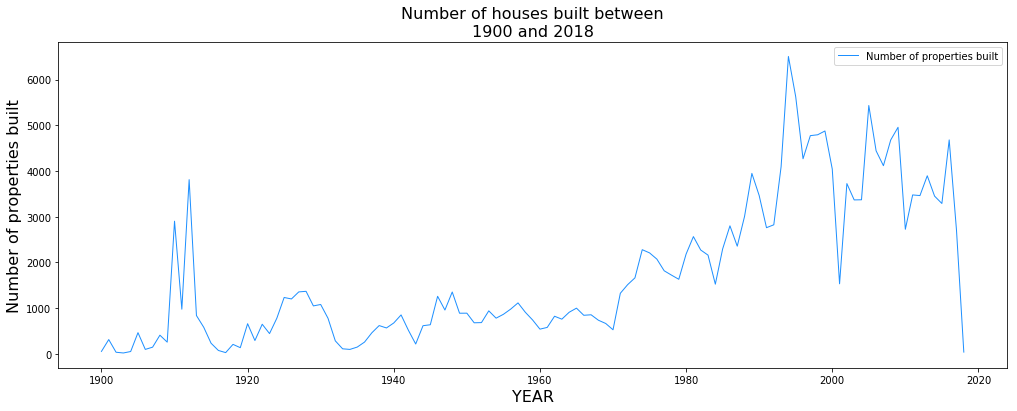

In [19]:
# Change the size of the figure (in inches).
plt.figure(figsize=(17,6))

# Plotting the graph using x and y with 'dodgerblue' color.
# Different labels can be given to different lines in the same plot.
# Linewidth determines the width of the line.
plt.plot(x, y, 'dodgerblue', label = 'Number of properties built', linewidth = 1)

# X-axis label.
plt.xlabel('YEAR', fontsize = 16)

# Y-axis label.
plt.ylabel('Number of properties built', fontsize = 16)

# Title of the plot.
plt.title('Number of houses built between\n1900 and 2018', fontsize = 16)

# Grid
# plt.grid(True)
plt.grid(False)

# Legend for the plot.
plt.legend()

In [ ]:
# Saving the figure on disk. 'dpi' and 'quality' can be adjusted according to the required image quality.
plt.savefig('Line_plot.png', dpi = 400, quality = 100)

# Clears the current figure contents.
plt.clf()

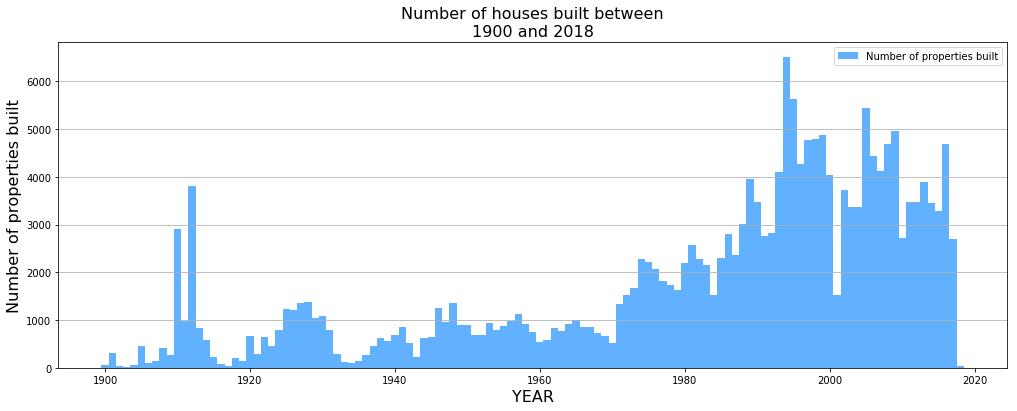

In [20]:
plt.figure(figsize=(17,6))

# Plotting the graph using x and y with 'dodgerblue' color.
# Different labels can be given to different bar plots in the same plot.
# Linewidth determines the width of the line.
plt.bar(x, y, label = 'Number of properties built', color = 'dodgerblue',  width = 1, align = 'center', alpha = 0.7)

# X-axis label.
plt.xlabel('YEAR', fontsize = 16)

# Y-axis label.
plt.ylabel('Number of properties built', fontsize = 16)

# Title of the plot.
plt.title('Number of houses built between\n1900 and 2018', fontsize = 16)

# Grid
# plt.grid(True)
plt.grid(axis='y')

# Legend for the plot.
plt.legend()

In [ ]:
# Saving the figure on disk. 'dpi' and 'quality' can be adjusted according to the required image quality.
plt.savefig('Bar_plot.png', dpi = 400, quality = 100)

# Clears the current figure contents.
plt.clf()

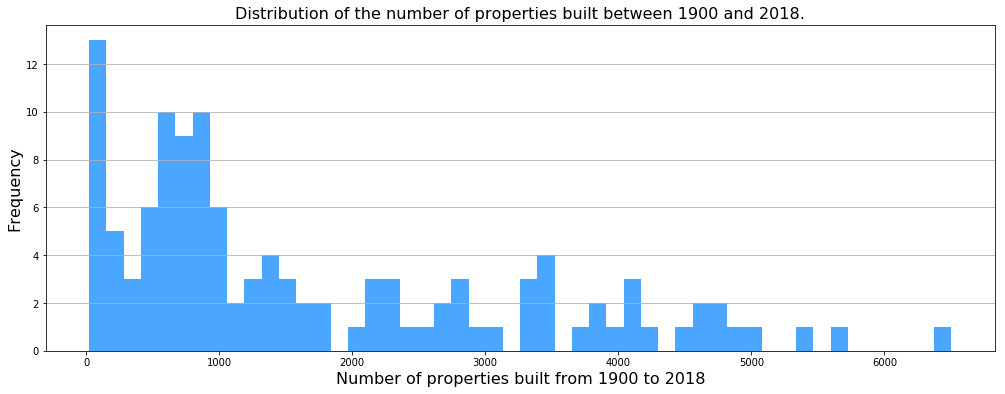

In [21]:
# Change the size of the figure (in inches).
plt.figure(figsize=(17,6))

# X-axis: Number of properties built from 1900 to 2018.
# Y-axis: Frequency.
plt.hist(df['No_of_properties_built'],
         bins = 50,
         histtype='bar',
         rwidth = 1.0,
         color = 'dodgerblue',
         alpha = 0.8
        )

# X-axis label.
plt.xlabel('Number of properties built from 1900 to 2018', fontsize = 16)

# Y-axis label.
plt.ylabel('Frequency', fontsize = 16)

# Title of the plot.
plt.title('Distribution of the number of properties built between 1900 and 2018.', fontsize = 16)

# Grid
# plt.grid(True)
plt.grid(axis='y')

In [ ]:
# Saving the figure on disk. 'dpi' and 'quality' can be adjusted according to the required image quality.
plt.savefig('Histogram.png', dpi = 400, quality = 100)

# Clears the current figure contents.
plt.clf()

In [23]:
df = pd.read_csv("property_tax_report.csv")

# Filtering out the null values in ZONE_CATEGORY
df = df[df['ZONE_CATEGORY'].notnull()]

# Grouping by ZONE_CATEGORY and aggregating based on PID to count the number of properties for a particular zone.
df_zone_properties = df.groupby('ZONE_CATEGORY', as_index=False)['PID'].count().rename(columns = {'PID':'No_of_properties'})

In [24]:
# Counting the total number of properties.
total_properties = df_zone_properties['No_of_properties'].sum()

In [25]:
# Calculating the percentage share of each ZONE for the number of properties in the total number of properties.
df_zone_properties['percentage_of_properties'] = ((df_zone_properties['No_of_properties'] / total_properties) * 100)

# Finding the ZONES with the top-5 percentage share in the total number of properties.
df_top_5_zone_percentage = df_zone_properties.nlargest(columns='percentage_of_properties', n = 5)

Text(0.5, 1.0, 'Top-5 zone categories with the highest percentage\nshare in the total number of properties.')

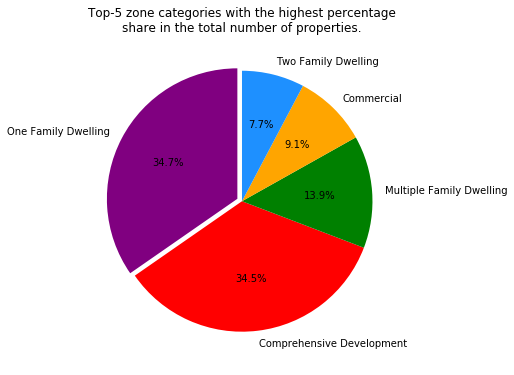

In [28]:
plt.figure(figsize=(8,6))

# Slices: percentage_of_properties.
slices = df_top_5_zone_percentage['percentage_of_properties']
# Categories: ZONE_CATEGORY.
categories = df_top_5_zone_percentage['ZONE_CATEGORY']
# For different colors: https://matplotlib.org/examples/color/named_colors.html
cols = ['purple', 'red', 'green', 'orange', 'dodgerblue']

# Plotting the pie-chart.
plt.pie(slices,
        labels = categories,
        colors=cols,
        startangle = 90,
#         shadow = True,
        # To drag the slices away from the centre of the plot.
        explode = (0.040,0,0,0,0),
        # To display the percent value using Python string formatting.
        autopct = '%1.1f%%'
       )

# Title of the plot.
plt.title('Top-5 zone categories with the highest percentage\nshare in the total number of properties.', fontsize = 12)

In [ ]:
# Saving the figure on disk. 'dpi' and 'quality' can be adjusted according to the required image quality.
plt.savefig('Pie_chart.png', dpi = 400, quality = 100)

# Clears the current figure contents.
plt.clf()

In [30]:
df = pd.read_csv("property_tax_report.csv")
df = df[(df['PROPERTY_POSTAL_CODE'].notnull())]

# Grouping by YEAR_BUILT and aggregating based on PID to count the number of properties for each year.
df = df[['PID', 'YEAR_BUILT']].groupby('YEAR_BUILT', as_index = False).count().astype('int').rename(columns = {'PID':'No_of_properties_built'})

# Filtering YEAR_BUILT and keeping only the values between 1900 to 2018.
df = df[(df['YEAR_BUILT'] >= 1900) & (df['YEAR_BUILT'] <= 2018)]

# X-axis: YEAR_BUILT
x = df['YEAR_BUILT']

# Y-axis: Number of properties built.
y = df['No_of_properties_built']

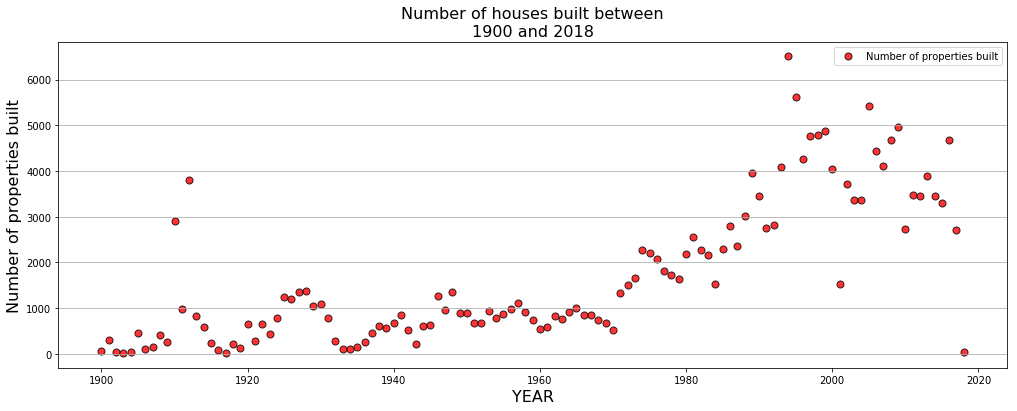

In [31]:
plt.figure(figsize=(17,6))

# Plotting the scatter plot.
# For different types of markers: https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
plt.scatter(x, y, label = 'Number of properties built',s = 200, color = 'red',
            alpha = 0.8, marker = '.', edgecolors='black')

# X-axis label.
plt.xlabel('YEAR', fontsize = 16)

# Y-axis label.
plt.ylabel('Number of properties built', fontsize = 16)

# Title of the plot.
plt.title('Number of houses built between\n1900 and 2018', fontsize = 16)

# Grid
# plt.grid(True)
plt.grid(axis='y')

# Legend for the plot.
plt.legend()

In [ ]:
# Saving the figure on disk. 'dpi' and 'quality' can be adjusted according to the required image quality.
plt.savefig('Scatter_plot.png', dpi = 400, quality = 100)

# Clears the current figure contents.
plt.clf()